# Example 7 in Topic 7

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2, re, cos, exp_polar, pi
from sympy.abc import A,B,t,f 
from sympy import re, im 

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [19]:
tlim = 4
tt = np.linspace(-tlim, tlim, 1000)
flim = 2
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

p = Symbol('p')
sincu = lambda t,p: sinc(p*pi*t) # swithc to sinc ftn that evetyone else uses...

In [20]:
tri = Piecewise((0, t <= -1),(t+1, t <= 0),(1-t, t <= 1),(0, True))
lam_tri = lambdify(t, tri, modules=['numpy'])
f7 = Piecewise((0, t <= -2),(t+2, t <= -1),(1, t <= 1),(2-t, t <= 2),(0, True))
lam_f7 = lambdify(t, f7, modules=['numpy'])
Q7 = fourier_transform(f7, t, f)
lam_Q7 = lambdify(f, re(Q7), modules=['numpy'])

# see section 7.6
def Q7_analytic(f):
    return (1+2*np.cos(2*np.pi*f))*np.sinc(f)**2 ## numpy sinc doesn't require the pi, sympy's does

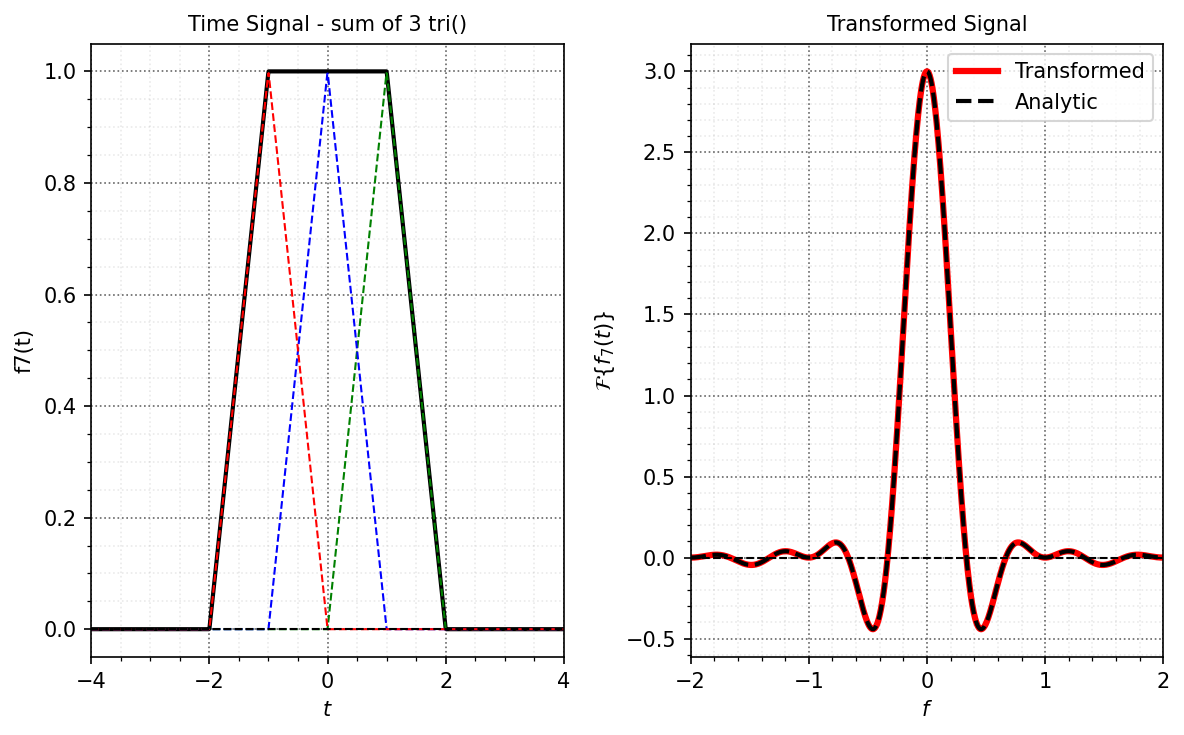

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
ax1.plot(tt, lam_f7(tt), 'k-', lw=2)
ax1.plot(tt, lam_tri(tt-1), 'g--', lw=1)
ax1.plot(tt, lam_tri(tt), 'b--', lw=1)
ax1.plot(tt, lam_tri(tt+1), 'r--', lw=1)
ax1.set_title('Time Signal - sum of 3 tri()')
ax1.set_ylabel('f7(t)')
ax1.set_xlabel('$t$')
nicegrid(ax1)

ax2.plot(ff, lam_Q7(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, Q7_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_7(t)\}$')
ax2.set_xlabel('$f$')
nicegrid(ax2)
plt.legend()
plt.show()

In [22]:
SS6 = my_rect(4)*cos(pi*t)
lam_SS6 = lambdify(t, SS6, modules=['numpy'])
QSS6 = fourier_transform(SS6, t, f)
lam_QSS6 = lambdify(f, QSS6, modules=['numpy'])

def QSS6_analytic(f):
    return 2*np.sinc(4*f-2) + 2*np.sinc(4*f+2) ## numpy sinc doesn't require the pi, sympy's does

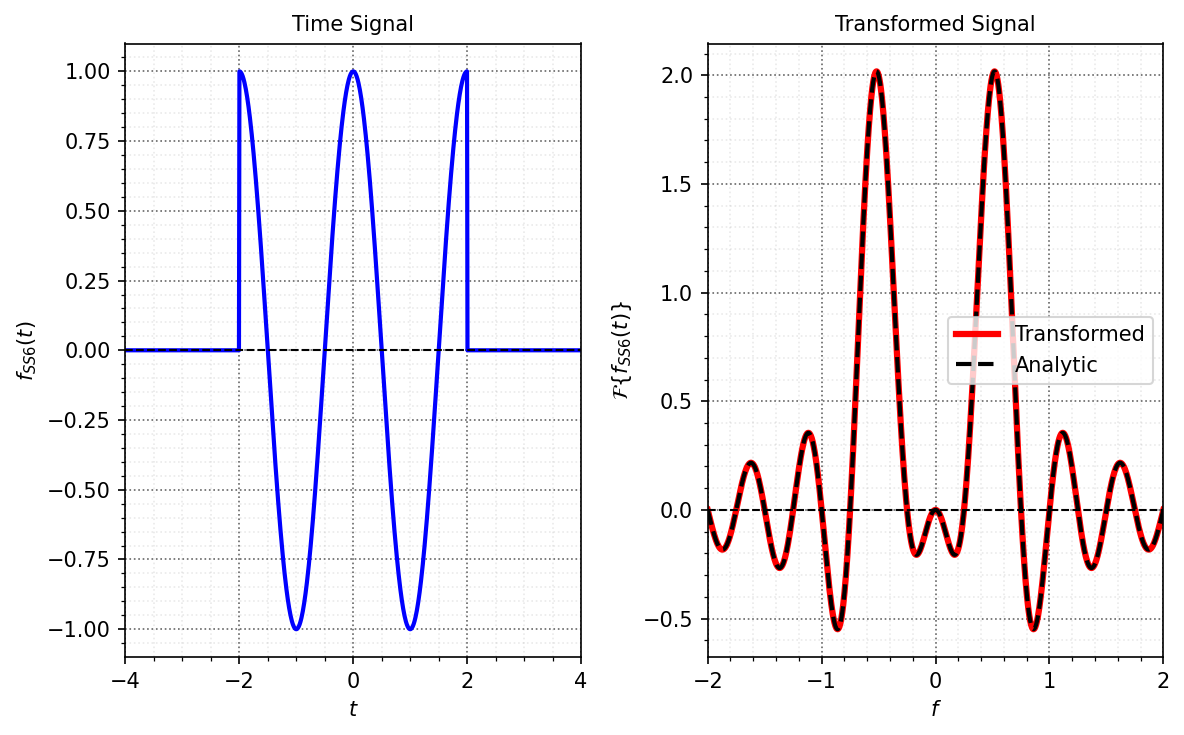

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
ax1.plot(tt, lam_SS6(tt), 'b-', lw=2)
ax1.set_title('Time Signal')
ax1.set_ylabel('$f_{SS6}(t)$')
ax1.set_xlabel('$t$')
nicegrid(ax1)

ax2.plot(ff, lam_QSS6(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, QSS6_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_{SS6}(t)\}$')
ax2.set_xlabel('$f$')
nicegrid(ax2)
plt.legend()
plt.show()